In [1]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Import Dataset yang sudah dimodifikasi (Gender sudah numerik)
dataset = pd.read_csv('Social_Network_Ads_Modify.csv')

In [13]:
# Pilih fitur dan label
# X terdiri dari Gender, Age, dan EstimatedSalary
X = dataset.iloc[:, [1, 2, 3]].values  # Gender, Age, Estimated Salary
y = dataset.iloc[:, -1].values  # Purchased

In [14]:
# Split Dataset (Training set dan Test set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 7 25]]


C:\Users\ACER\AppData\Local\Temp\ipykernel_19248\3100773542.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 2],


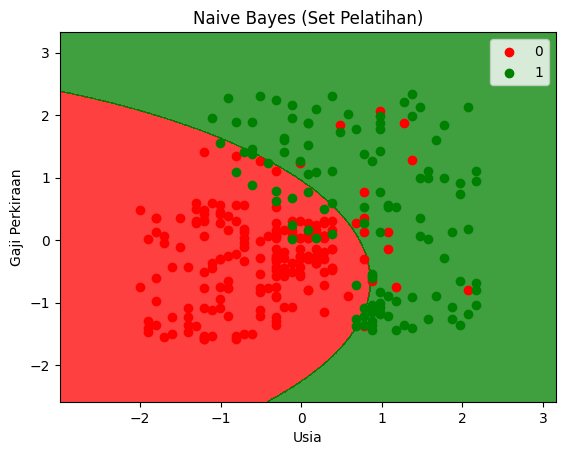

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Set Gender ke nilai konstan (misalnya, nilai rata-rata atau 0)
# Untuk visualisasi, kita bisa memilih nilai Gender = 0 atau 1
constant_gender_value = 0  # Ubah sesuai dengan gender yang ingin divisualisasikan

# Membuat grid mesh untuk Age dan Estimated Salary
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 2].min() - 1, stop=X_set[:, 2].max() + 1, step=0.01))

# Membuat prediksi berdasarkan grid mesh dengan Gender yang konstan
predictions = classifier.predict(np.array([[constant_gender_value] * X1.size, X1.ravel(), X2.ravel()]).T)

# Mengubah bentuk prediksi agar sesuai dengan grid mesh
predictions = predictions.reshape(X1.shape)

# Memplot hasil
plt.contourf(X1, X2, predictions, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot untuk set pelatihan
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 2],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Set Pelatihan)')
plt.xlabel('Usia')
plt.ylabel('Gaji Perkiraan')
plt.legend()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_19248\3807073336.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 2],


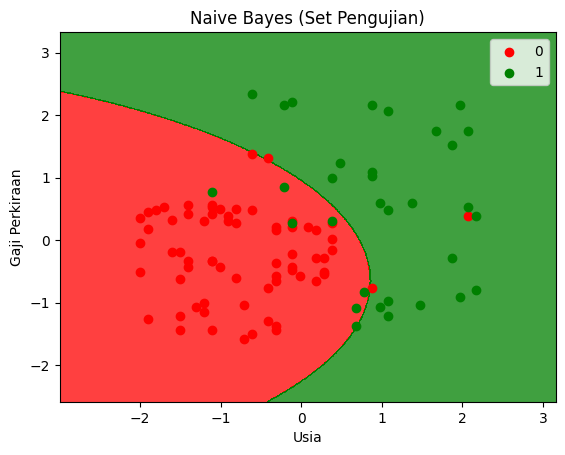

In [21]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 2].min() - 1, stop=X_set[:, 2].max() + 1, step=0.01))

# Membuat prediksi berdasarkan grid mesh untuk set pengujian
predictions = classifier.predict(np.array([[constant_gender_value] * X1.size, X1.ravel(), X2.ravel()]).T)
predictions = predictions.reshape(X1.shape)

# Memplot hasil untuk set pengujian
plt.contourf(X1, X2, predictions, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot untuk set pengujian
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 2],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Set Pengujian)')
plt.xlabel('Usia')
plt.ylabel('Gaji Perkiraan')
plt.legend()
plt.show()